***Project 3 - Pandas***

 Lakukan Data Cleaning dan EDA
- Lakukan Analisis Regresi pada dataset tersebut
- Gunakan minimal 2 metodologi/algoritma
- Lakukan evaluasi pada masing-masing model dan berikan penjelasannya
- Jelaskan variabel yang berpengaruh
- Lakukan prediksi berdasarkan model yang dibuat untuk dataset berikut:
https://drive.google.com/file/d/12ZfF305OtqupFL15HPuRX4B3I6ifvDbP/view?usp=sharing

Pembagian:
- EDA 2 (Armand & Tyo)
- PreProcessing 2 (Wawan & Dian) ft Tyo
- Model Development 2 (Abil & Azizah) ft Tyo
- Evaluasi Model - Fine Tuning 2 (Vio & Iqbal) ft Tyo

In [ ]:
!pip install shap
!pip install pycaret[analysis]

#Import Library

In [ ]:
# import library
import pandas as pd
import numpy as np

#import visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#import ML model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression #, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
#from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor #, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder #LabelEncoder, MinMaxScaler, RobustScaler
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
# from sklearn import tree
import pickle
import statsmodels.api as sm

#import evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import zscore

#Load Dataset

In [ ]:
# Load your data from the CSV file
data = pd.read_csv('https://raw.githubusercontent.com/tyoamazinglib/data_batch32/main/Dataset2_House_Price.csv')

data

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom,price
0,2005,75523,3,0,7,7559081.5
1,2015,80771,39,1,2,8085989.5
2,2021,55712,58,1,9,5574642.1
3,2012,32316,47,0,3,3232561.2
4,1990,70429,19,1,4,7055052.0
...,...,...,...,...,...,...
9995,2009,1726,89,0,4,176425.9
9996,1990,44403,29,0,0,4448474.0
9997,2005,83841,3,1,9,8390030.5
9998,2010,59036,70,1,4,5905107.0


In [ ]:
# Assuming you have a target variable (y) and predictor variables (X)
# Adjust the column names accordingly
X = data.drop('price', axis=1)
# X = sm.add_constant(X)  # Add a constant term (intercept) (parameter Alpha)
y = data['price']

#EDA

In [ ]:
# Load cleaned dataset
data

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom,price
0,2005,75523,3,0,7,7559081.5
1,2015,80771,39,1,2,8085989.5
2,2021,55712,58,1,9,5574642.1
3,2012,32316,47,0,3,3232561.2
4,1990,70429,19,1,4,7055052.0
...,...,...,...,...,...,...
9995,2009,1726,89,0,4,176425.9
9996,1990,44403,29,0,0,4448474.0
9997,2005,83841,3,1,9,8390030.5
9998,2010,59036,70,1,4,5905107.0


In [ ]:
# Clean DataFrame Shape
data.shape

(10000, 6)

In [ ]:
data.dtypes

made                int64
squareMeters        int64
numberOfRooms       int64
hasStorageRoom      int64
hasGuestRoom        int64
price             float64
dtype: object

In [ ]:
# Cheking DataFrame Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   made            10000 non-null  int64  
 1   squareMeters    10000 non-null  int64  
 2   numberOfRooms   10000 non-null  int64  
 3   hasStorageRoom  10000 non-null  int64  
 4   hasGuestRoom    10000 non-null  int64  
 5   price           10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [ ]:
# Mendeteksi nilai kosong
data.isna().any()

made              False
squareMeters      False
numberOfRooms     False
hasStorageRoom    False
hasGuestRoom      False
price             False
dtype: bool

In [ ]:
data.duplicated().value_counts()

False    10000
dtype: int64

In [ ]:
# Menggunakan describe untuk mendapatkan statistik deskriptif
data.describe()

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.00000,1.000000e+04
mean,2005.48850,49870.13120,50.358400,0.503000,4.99460,4.993448e+06
std,9.30809,28774.37535,28.816696,0.500016,3.17641,2.877424e+06
min,1990.00000,89.00000,1.000000,0.000000,0.00000,1.031350e+04
25%,1997.00000,25098.50000,25.000000,0.000000,2.00000,2.516402e+06
50%,2005.50000,50105.50000,50.000000,1.000000,5.00000,5.016180e+06
75%,2014.00000,74609.75000,75.000000,1.000000,8.00000,7.469092e+06
max,2021.00000,99999.00000,100.000000,1.000000,10.00000,1.000677e+07


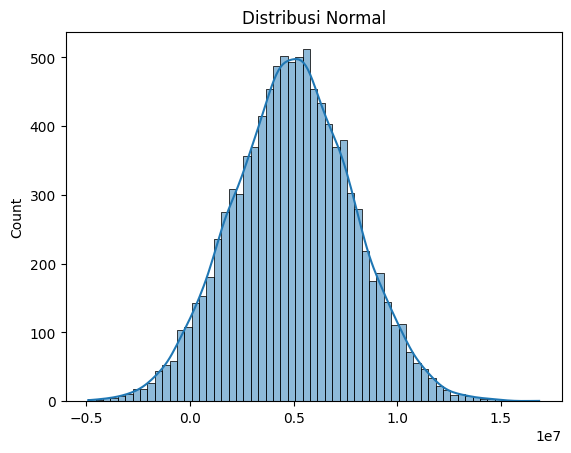

In [ ]:
# Menghasilkan data yang terdistribusi normal
data_distribusi = np.random.normal(loc=data['price'].mean(), scale=data['price'].std(), size=len(data))

# Plot histogram distribusi normal
sns.histplot(data_distribusi, kde=True)
plt.title('Distribusi Normal')
plt.show()

In [ ]:
# Checking Corelation
data.corr()

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom,price
made,1.000000,-0.007207,0.003978,-0.007868,-0.005431,-0.007210
squareMeters,-0.007207,1.000000,0.009573,-0.003486,-0.000623,0.999999
numberOfRooms,0.003978,0.009573,1.000000,-0.004760,-0.015529,0.009591
hasStorageRoom,-0.007868,-0.003486,-0.004760,1.000000,0.015186,-0.003485
hasGuestRoom,-0.005431,-0.000623,-0.015529,0.015186,1.000000,-0.000644
price,-0.007210,0.999999,0.009591,-0.003485,-0.000644,1.000000


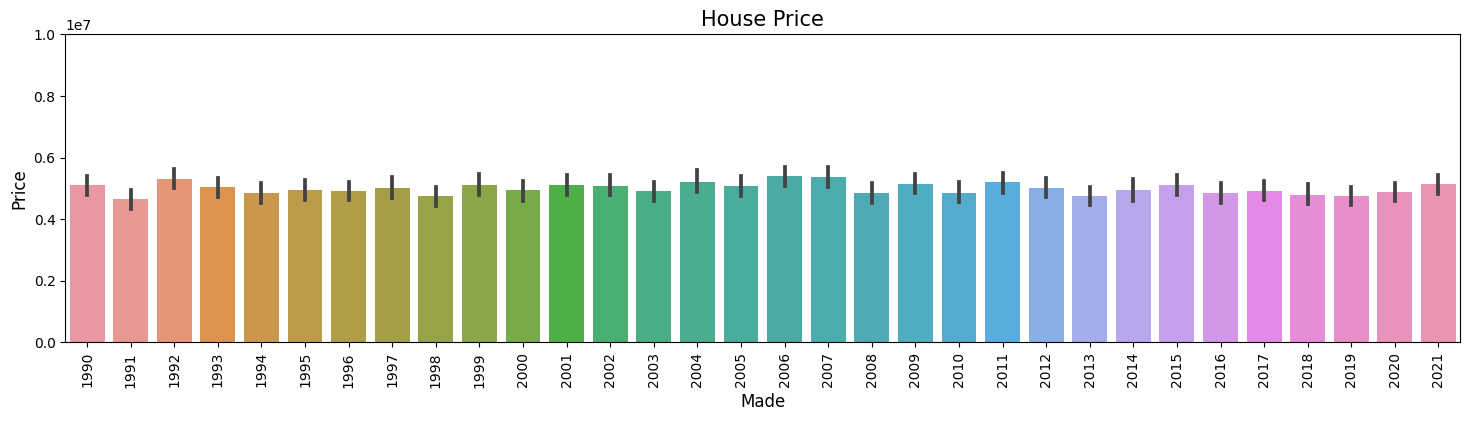

In [ ]:
labels = pd.DataFrame(data).sort_values(['price'], ascending=False)

ax = sns.barplot(data=labels, y="price", x="made")

plt.xticks(rotation=90)

ax.figure.set_size_inches(18, 4)
ax.set_title('House Price', fontsize=15)
ax.set_xlabel("Made", fontsize=12)
ax.set_ylabel("Price", fontsize=12)

# Remove y-axis limit
ax.set_ylim(0, labels['price'].max())

plt.show()

<AxesSubplot: >

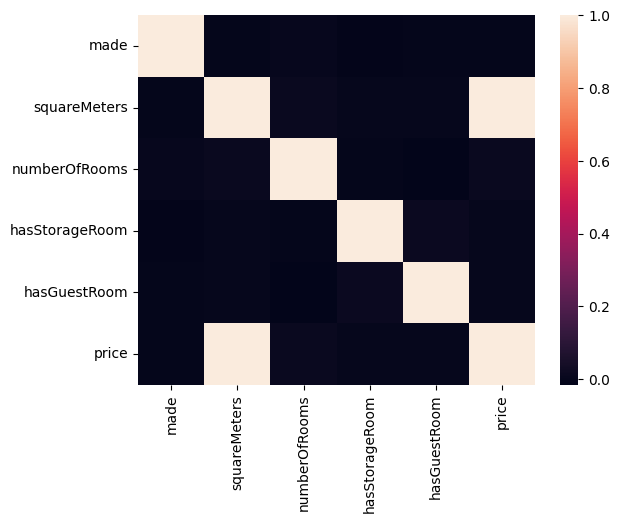

In [ ]:
sns.heatmap(data=data.corr())

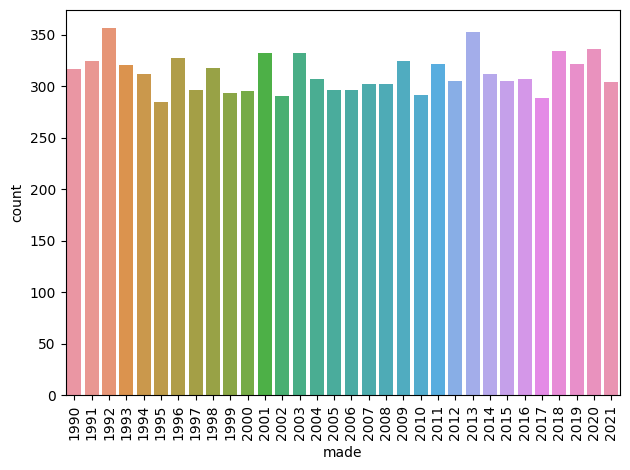

In [ ]:
sns.countplot(data=data, x='made')
plt.xticks(rotation=90)
plt.tight_layout()

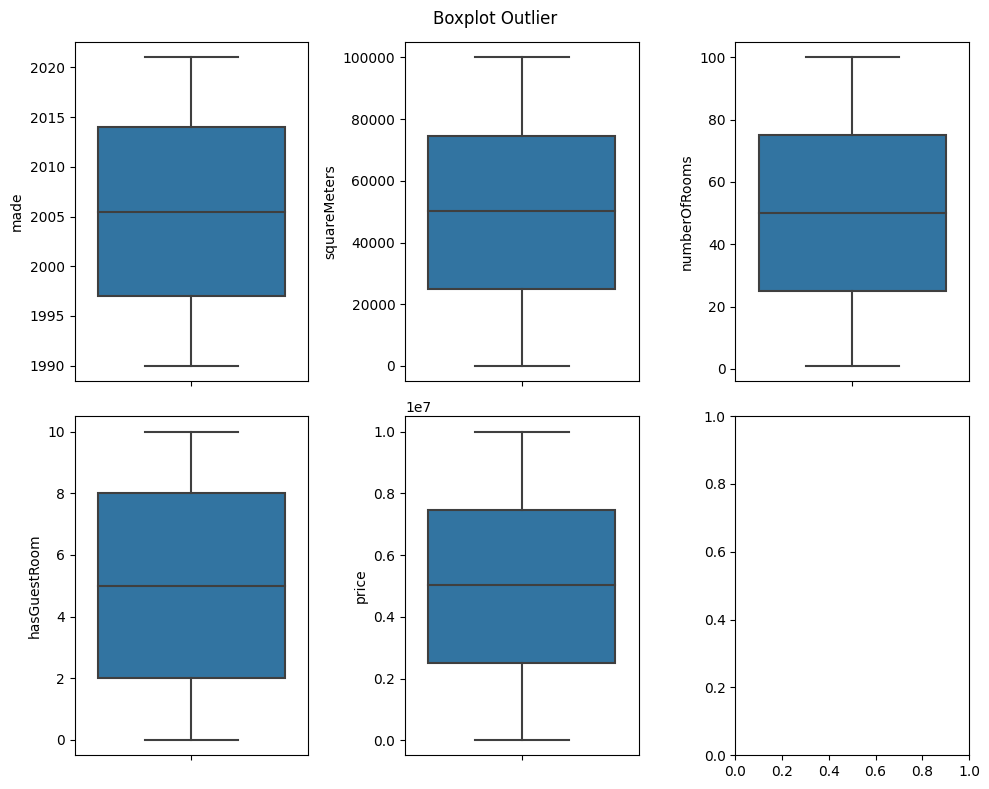

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
plt.suptitle('Boxplot Outlier')
sns.boxplot(ax=axes[0, 0], y=data['made'], whis=1.5) #whis itu parameter standar keseimbangan, 1.5 dah paling minimal
sns.boxplot(ax=axes[0, 1], y=data['squareMeters'], whis=1.5)
sns.boxplot(ax=axes[0, 2], y=data['numberOfRooms'], whis=1.5)
# sns.boxplot(ax=axes[1, 0], y=data['hasStorageRoom'], whis=1.5) binary data
sns.boxplot(ax=axes[1, 0], y=data['hasGuestRoom'], whis=1.5)
sns.boxplot(ax=axes[1, 1], y=data['price'], whis=1.5)
plt.tight_layout()
plt.show()

In [ ]:
#check outlier data, jika index = [], maka tidak ada data outlier
numerical_columns = ['made', 'squareMeters', 'numberOfRooms', 'hasStorageRoom', 'hasGuestRoom', 'price']
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1 #rentang quartile
outlier_indices = ((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1) #1.5 merupakan nilai minimum standar keseimbangan
print(data[outlier_indices])

Empty DataFrame
Columns: [made, squareMeters, numberOfRooms, hasStorageRoom, hasGuestRoom, price]
Index: []


In [ ]:
Q1, Q3, IQR

(made                 1997.00
 squareMeters        25098.50
 numberOfRooms          25.00
 hasStorageRoom          0.00
 hasGuestRoom            2.00
 price             2516401.95
 Name: 0.25, dtype: float64,
 made                 2014.00
 squareMeters        74609.75
 numberOfRooms          75.00
 hasStorageRoom          1.00
 hasGuestRoom            8.00
 price             7469092.45
 Name: 0.75, dtype: float64,
 made                   17.00
 squareMeters        49511.25
 numberOfRooms          50.00
 hasStorageRoom          1.00
 hasGuestRoom            6.00
 price             4952690.50
 dtype: float64)

# Pre-Processing

In [ ]:
# data preprocessing

data_prepro_new = data.copy()
# Select features and target variable
X = data_prepro_new.drop(columns=["price"])
y = data_prepro_new["price"]

scaler = StandardScaler()
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model Development

## Training & Testing Model

In [ ]:
from pycaret.regression import *

In [ ]:
# Create a DataFrame to store model evaluation metrics
evaluation_df = pd.DataFrame(columns=['Model', 'R-Squared', 'MAE', 'MAPE'])

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train) #buat model
linear_reg_train = linear_reg_model.predict(X_train)
linear_reg_preds = linear_reg_model.predict(X_test)

# Evaluate Linear Regression
r2_linear = r2_score(y_test, linear_reg_preds)
mae_linear = mean_absolute_error(y_test, linear_reg_preds)
mape_linear = (abs((y_test - linear_reg_preds) / y_test)).mean() * 100

evaluation_df = evaluation_df.append({'Model': 'Linear Regression', 'R-Squared': r2_linear, 'MAE': mae_linear, 'MAPE': mape_linear}, ignore_index=True)

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_train = ridge_model.predict(X_train)
ridge_preds = ridge_model.predict(X_test)

# Evaluate Ridge Regression
r2_ridge = r2_score(y_test, ridge_preds)
mae_ridge = mean_absolute_error(y_test, ridge_preds)
mape_ridge = (abs((y_test - ridge_preds) / y_test)).mean() * 100

evaluation_df = evaluation_df.append({'Model': 'Ridge Regression', 'R-Squared': r2_ridge, 'MAE': mae_ridge, 'MAPE': mape_ridge}, ignore_index=True)

# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_train = lasso_model.predict(X_train)
lasso_preds = lasso_model.predict(X_test)

# Evaluate Lasso Regression
r2_lasso = r2_score(y_test, lasso_preds)
mae_lasso = mean_absolute_error(y_test, lasso_preds)
mape_lasso = (abs((y_test - lasso_preds) / y_test)).mean() * 100

evaluation_df = evaluation_df.append({'Model': 'Lasso Regression', 'R-Squared': r2_lasso, 'MAE': mae_lasso, 'MAPE': mape_lasso}, ignore_index=True)

# Elastic Net
elastic_net_model = ElasticNet()
elastic_net_model.fit(X_train, y_train)
elastic_net_preds = elastic_net_model.predict(X_test)

# Evaluate Elastic Net
r2_elastic_net = r2_score(y_test, elastic_net_preds)
mae_elastic_net = mean_absolute_error(y_test, elastic_net_preds)
mape_elastic_net = (abs((y_test - elastic_net_preds) / y_test)).mean() * 100

evaluation_df = evaluation_df.append({'Model': 'Elastic Net', 'R-Squared': r2_elastic_net, 'MAE': mae_elastic_net, 'MAPE': mape_elastic_net}, ignore_index=True)

# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# Evaluate Decision Tree
r2_dt = r2_score(y_test, dt_preds)
mae_dt = mean_absolute_error(y_test, dt_preds)
mape_dt = (abs((y_test - dt_preds) / y_test)).mean() * 100

evaluation_df = evaluation_df.append({'Model': 'Decision Tree', 'R-Squared': r2_dt, 'MAE': mae_dt, 'MAPE': mape_dt}, ignore_index=True)

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_train = rf_model.predict(X_train)
rf_preds = rf_model.predict(X_test)

# Evaluate Random Forest
r2_rf = r2_score(y_test, rf_preds)
mae_rf = mean_absolute_error(y_test, rf_preds)
mape_rf = (abs((y_test - rf_preds) / y_test)).mean() * 100

evaluation_df = evaluation_df.append({'Model': 'Random Forest', 'R-Squared': r2_rf, 'MAE': mae_rf, 'MAPE': mape_rf}, ignore_index=True)

# XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Evaluate XGBoost
r2_xgb = r2_score(y_test, xgb_preds)
mae_xgb = mean_absolute_error(y_test, xgb_preds)
mape_xgb = (abs((y_test - xgb_preds) / y_test)).mean() * 100

evaluation_df = evaluation_df.append({'Model': 'XGBoost', 'R-Squared': r2_xgb, 'MAE': mae_xgb, 'MAPE': mape_xgb}, ignore_index=True)

evaluation_df

,Model,R-Squared,MAE,MAPE
0,Linear Regression,0.999999,2631.718925,0.209221
1,Ridge Regression,0.999999,2655.235242,0.219604
2,Lasso Regression,0.999999,2631.679730,0.209255
3,Elastic Net,0.888558,859410.199371,100.228232
4,Decision Tree,0.999997,4188.707750,0.296704
5,Random Forest,0.999998,3233.404252,0.236651
6,XGBoost,0.999979,11024.760964,0.766500


### Berdasarkan hasil di atas, kita akan mengambil model:
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Random Forest

Karena dari keempat model tersebut memiliki nilai MAE dan MAPE terendah dengan perbedaan antar model tidak begitu jauh

#Evaluasi

In [ ]:
#Fungsi untuk menampilkan hasil evaluasi metric
def regression_eval(aktual, prediksi, name):
    mae = mean_absolute_error(aktual, prediksi)
    mse = mean_squared_error(aktual, prediksi)
    rmse = np.sqrt(mse)
    r2 = r2_score(aktual, prediksi)
    print('Evaluation Model:', name)
    print('Mean Absolute Error (MAE):', round(mae, 2))
    print('Mean Squared Error (MSE):', round(mse, 2))
    print('Root Mean Squared Error (RMSE):', round(rmse, 2))
    print('R-squared (R2):', r2*100, '%')

#### 1. Linear Regression Eval

In [ ]:
regression_eval(y_train, linear_reg_train, 'Linear Regression Eval (Train)')

Evaluation Model: Linear Regression Eval (Train)
Mean Absolute Error (MAE): 2645.54
Mean Squared Error (MSE): 10655388.31
Root Mean Squared Error (RMSE): 3264.26
R-squared (R2): 99.99986933005185 %


In [ ]:
regression_eval(y_test, linear_reg_preds, 'Linear Regression Eval (Test)')

Evaluation Model: Linear Regression Eval (Test)
Mean Absolute Error (MAE): 2631.72
Mean Squared Error (MSE): 10579140.64
Root Mean Squared Error (RMSE): 3252.56
R-squared (R2): 99.99987921640246 %


#### 2. Ridge Regression Eval

In [ ]:
regression_eval(y_train, ridge_train, 'Ridge Regression (Train)')

Evaluation Model: Ridge Regression (Train)
Mean Absolute Error (MAE): 2659.15
Mean Squared Error (MSE): 10782797.77
Root Mean Squared Error (RMSE): 3283.72
R-squared (R2): 99.99986776759462 %


In [ ]:
regression_eval(y_test, ridge_preds, 'Ridge Regression (Test)')

Evaluation Model: Ridge Regression (Test)
Mean Absolute Error (MAE): 2655.24
Mean Squared Error (MSE): 10738099.87
Root Mean Squared Error (RMSE): 3276.9
R-squared (R2): 99.9998774015417 %


#### 3. Lasso Regression Eval

In [ ]:
regression_eval(y_train, lasso_train, 'Lasso Regression (Train)')

Evaluation Model: Lasso Regression (Train)
Mean Absolute Error (MAE): 2645.51
Mean Squared Error (MSE): 10655393.33
Root Mean Squared Error (RMSE): 3264.26
R-squared (R2): 99.99986932999022 %


In [ ]:
regression_eval(y_test, lasso_preds, 'Lasso Regression (Test)')

Evaluation Model: Lasso Regression (Test)
Mean Absolute Error (MAE): 2631.68
Mean Squared Error (MSE): 10578761.46
Root Mean Squared Error (RMSE): 3252.5
R-squared (R2): 99.99987922073169 %


### 4. Random Forest

In [ ]:
regression_eval(y_train, rf_train, 'Random Forest Regression (Train)')

Evaluation Model: Random Forest Regression (Train)
Mean Absolute Error (MAE): 1169.7
Mean Squared Error (MSE): 2152608.14
Root Mean Squared Error (RMSE): 1467.18
R-squared (R2): 99.99997360197618 %


In [ ]:
regression_eval(y_test, rf_preds, 'Random Forest Regression (Test)')

Evaluation Model: Random Forest Regression (Test)
Mean Absolute Error (MAE): 3233.4
Mean Squared Error (MSE): 16420798.44
Root Mean Squared Error (RMSE): 4052.26
R-squared (R2): 99.99981252134022 %


Pada model random forest, nilai MAE mengalami kenaikan saat testing sehingga tidak cocok untuk data ini.

Ketiga model lainnya memliki

In [ ]:
from pycaret.regression import *
reg = setup(session_id=111,
            data = data,
             target = 'price',
             numeric_imputation = 'mean',
            #categorical_features=['made', 'squareMeters'],
            #  ignore_features = [''],
             normalize = 'false',
            fold=10,
            remove_outliers='true'
            # silent = True
            )

,Description,Value
0,Session id,111
1,Target,price
2,Target type,Regression
3,Original data shape,"(10000, 6)"
4,Transformed data shape,"(9650, 6)"
5,Transformed train set shape,"(6650, 6)"
6,Transformed test set shape,"(3000, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# Fit the linear regression model using statsmodels
model = sm.OLS(y, X).fit()

# Get a summary of the regression model
model_summary = model.summary()

# Print the model summary
print(model_summary)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.240e+09
Date:                Mon, 11 Dec 2023   Prob (F-statistic):                        0.00
Time:                        14:34:32   Log-Likelihood:                         -95090.
No. Observations:               10000   AIC:                                  1.902e+05
Df Residuals:                    9995   BIC:                                  1.902e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,2637.0211,10667454.9563,3265.4431,1.0000,0.0093,0.0019,2.4550
dt,Decision Tree Regressor,4322.1507,30031652.8292,5477.3157,1.0000,0.0128,0.0030,0.7750
lightgbm,Light Gradient Boosting Machine,10771.8153,168273790.9296,12969.1028,1.0000,0.0375,0.0089,0.9600
gbr,Gradient Boosting Regressor,15192.7398,398159103.8766,19946.2209,1.0000,0.0229,0.0075,1.1750
et,Extra Trees Regressor,3112.6509,15073742.3585,3880.9890,1.0000,0.0112,0.0023,1.8230
rf,Random Forest Regressor,3255.9791,16576082.4637,4070.0372,1.0000,0.0106,0.0023,2.3730
br,Bayesian Ridge,2637.0211,10667454.9953,3265.4431,1.0000,0.0093,0.0019,0.8360
lasso,Lasso Regression,2636.9111,10666820.6336,3265.3449,1.0000,0.0093,0.0019,0.5360
llar,Lasso Least Angle Regression,2636.9093,10666811.0520,3265.3434,1.0000,0.0093,0.0019,0.6100
omp,Orthogonal Matching Pursuit,2634.5041,10656940.2089,3263.7601,1.0000,0.0094,0.0019,0.5160


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

# Model Improvement and Tunning

In [ ]:
data_improve = data.copy()
X_improve = data_improve.drop(columns=["price","hasStorageRoom"])
y_improve = data_improve["price"]
scaler = StandardScaler()
X_train_improve, X_test_improve, y_train_improve, y_test_improve = train_test_split(X_improve, y_improve, test_size=0.2, random_state=42)
X_train_improve = scaler.fit_transform(X_train_improve)
X_test_improve = scaler.transform(X_test_improve)

In [ ]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'alpha': alphas}

In [ ]:
lasso_cv = GridSearchCV(lasso_model, param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train_improve, y_train_improve)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
best_alpha = lasso_cv.best_params_['alpha']

In [ ]:
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train_improve, y_train_improve)
lasso_train_improve = lasso_model.predict(X_train_improve)
lasso_preds_improve = lasso_model.predict(X_test_improve)

In [ ]:
regression_eval(y_train_improve, lasso_train_improve, 'Lasso Regression Improvement (Train)')

Evaluation Model: Lasso Regression Improvement (Train)
Mean Absolute Error (MAE): 2645.48
Mean Squared Error (MSE): 10655453.53
Root Mean Squared Error (RMSE): 3264.27
R-squared (R2): 99.99986932925202 %


In [ ]:
pickle.dump(lasso_model, open('lasso.pkl', 'wb'))

# Deployment

In [ ]:
# !pip install Werkzeug==2.2.2
# !pip install flask
# !pip install pyngrok==4.1.1
# !pip install flask_ngrok

In [ ]:
!ngrok authtoken 2YwqYBAiOKYQquOLg5PZr9iK6QX_5pJZyQurYxQFkLHRthT7q

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from flask import Flask, jsonify, request
from flask_ngrok import run_with_ngrok
from datetime import datetime
from flask.json import JSONEncoder

# Initialize Flask app
app = Flask(__name__)
run_with_ngrok(app)

@app.route('/prediksi', methods=['GET'])
def batch_32():
  with open('lasso.pkl', 'rb') as file:
    model = pickle.load(file)

  data = request.json
  input_data = pd.DataFrame(data, index=[0])
  input_data = scaler.transform(input_data)

  # make prediction
  prediction = model.predict(input_data)

  return jsonify({"Status": "Berhasil", "Hasil Prediction": "{:.2f}".format(float(prediction[0]))})

if __name__ == "__main__":
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://e313-35-224-29-76.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [11/Dec/2023 14:38:08] "GET /prediksi HTTP/1.1" 200 -


{
    "made" : 2005,
    "squareMeters" : 75523,
    "numberOfRooms" : 3,
    "hasGuestRoom" : 7
}

postman test params